#**Azure For Computer Vision**

In [ ]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

In [ ]:
my_cv_sub_key='44845b*********4763'
my_cv_end_point='https://visionfeature.cognitiveservices.azure.com/'

In [ ]:
my_analyze_url=my_cv_end_point+'vision/v2.1/analyze'
my_analyze_url

'https://visionfeature.cognitiveservices.azure.com/vision/v2.1/analyze'

In [ ]:
my_image_url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Paris_Night.jpg/2560px-Paris_Night.jpg'

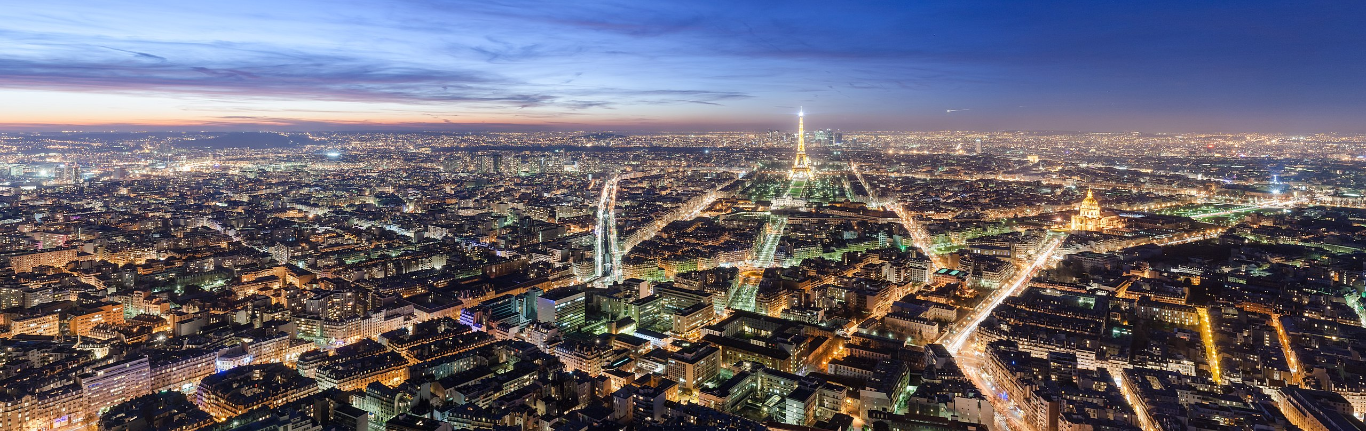

In [ ]:
headers={"ocp-Apim-Subscription-Key":my_cv_sub_key}
print(headers)
params={'visualFeatures':'Categories,Description,Objects'}
print(params)
data={'url':my_image_url}
print(data)
response=requests.post(my_analyze_url,headers=headers,params=params,json=data)
print(type(response))
response

{'ocp-Apim-Subscription-Key': '44845be19a26404a809e339961664763'}
{'visualFeatures': 'Categories,Description,Objects'}
{'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Paris_Night.jpg/2560px-Paris_Night.jpg'}
<class 'requests.models.Response'>


<Response [200]>

In [ ]:
analysis=response.json()
print(type(analysis))
print(analysis)

<class 'dict'>
{'categories': [{'name': 'abstract_', 'score': 0.00390625}, {'name': 'outdoor_', 'score': 0.0078125, 'detail': {'landmarks': [{'name': 'Tour Montparnasse', 'confidence': 0.9380523562431335}]}}], 'description': {'tags': ['outdoor', 'building', 'city', 'view', 'water', 'field', 'large', 'mountain', 'ocean', 'many', 'track', 'beach'], 'captions': [{'text': 'a view of Tour Montparnasse', 'confidence': 0.9382543191810944}]}, 'objects': [], 'requestId': '825e8af9-8c63-4b9a-a49f-caeb3d964978', 'metadata': {'height': 808, 'width': 2559, 'format': 'Jpeg'}}


#**Face Detection**

In [ ]:
sub_key='3c8bf9032c*******979a8'
assert sub_key

In [ ]:
base_url='https://photograph.cognitiveservices.azure.com//face/v1.0'
face_api=base_url+'/detect'
face_api #https://photograph.cognitiveservices.azure.com/

'https://photograph.cognitiveservices.azure.com//face/v1.0/detect'

In [ ]:
image_url='https://upload.wikimedia.org/wikipedia/commons/0/0e/Prime_Minister_of_India_Narendra_Modi.jpg'

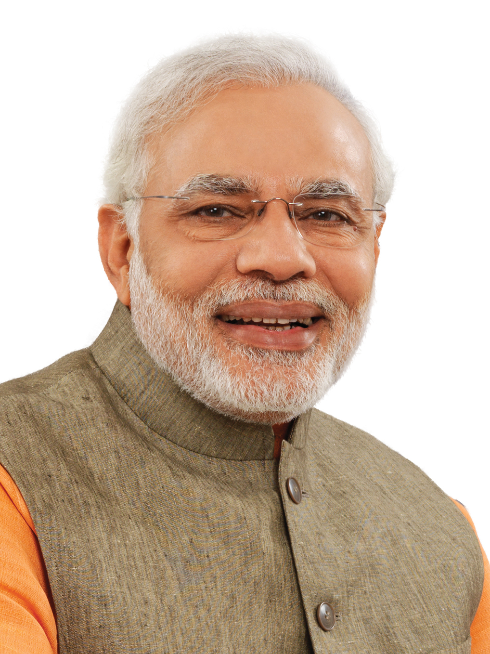

In [ ]:
headers={"ocp-Apim-Subscription-Key":sub_key}
params={'returnFaceId':'true',
       'returnFaceLandmarks':'false',
       'returnFaceAttributes':'age,gender,smile,facialHair,glasses,emotion,makeup'}
response=requests.post(face_api,params=params,headers=headers,json={'url':image_url})
results=response.json()
pprint(results)


[{'faceAttributes': {'age': 62.0,
                     'emotion': {'anger': 0.0,
                                 'contempt': 0.001,
                                 'disgust': 0.001,
                                 'fear': 0.0,
                                 'happiness': 0.97,
                                 'neutral': 0.029,
                                 'sadness': 0.0,
                                 'surprise': 0.0},
                     'facialHair': {'beard': 0.6,
                                    'moustache': 0.6,
                                    'sideburns': 0.6},
                     'gender': 'male',
                     'glasses': 'ReadingGlasses',
                     'makeup': {'eyeMakeup': False, 'lipMakeup': True},
                     'smile': 0.97},
  'faceId': '9df02b83-3d86-4123-a53a-7a2ea073fa65',
  'faceRectangle': {'height': 487, 'left': 318, 'top': 299, 'width': 487}}]
